# 3. Métodos de Regresión

## 3.0 Matrices de Dispersión

In [1]:
import pandas as pd

df_datos = pd.read_csv("datos/walmart.csv")
print(df_datos)

     Unnamed: 0  Store        Date  Weekly_Sales  Holiday_Flag  Temperature  \
0             1    1.0         NaN    1641957.44           1.0        38.51   
1             2    1.0  19-02-2010           NaN           0.0        39.93   
2             3    1.0  26-02-2010    1409727.59           NaN        46.63   
3             4    1.0  05-03-2010    1554806.68           0.0          NaN   
4             5    1.0  12-03-2010    1439541.59           0.0        57.79   
..          ...    ...         ...           ...           ...          ...   
137         138    1.0  28-09-2012    1437059.26           0.0        76.08   
138         139    1.0  05-10-2012    1670785.97           0.0        68.55   
139         140    1.0  12-10-2012    1573072.81           0.0        62.99   
140         141    1.0  19-10-2012    1508068.77           0.0        67.97   
141         142    1.0  26-10-2012    1493659.74           0.0        69.16   

     Fuel_Price         CPI  Unemployment Weekly_Ra

Gráficos de dispersión 2D

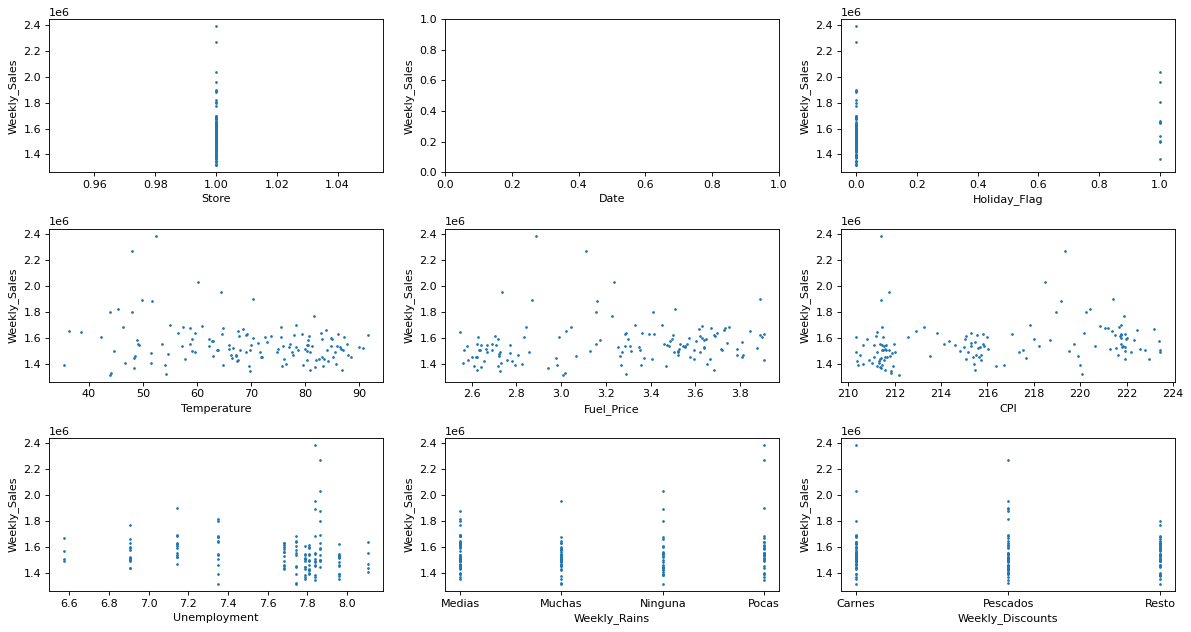

In [2]:
import matplotlib.pyplot as pl

pl.figure(figsize=(15, 8), dpi = 80)

pl.subplot(3, 3, 1)
pl.xlabel('Store')
pl.ylabel('Weekly_Sales')
pl.scatter(df_datos['Store'], df_datos['Weekly_Sales'], s=2)

pl.subplot(3, 3, 2)
pl.xlabel('Date')
pl.ylabel('Weekly_Sales')
# pl.scatter(df_datos['Date'], df_datos['Weekly_Sales'], s=2)

pl.subplot(3, 3, 3)
pl.xlabel('Holiday_Flag')
pl.ylabel('Weekly_Sales')
pl.scatter(df_datos['Holiday_Flag'], df_datos['Weekly_Sales'], s=2)

pl.subplot(3, 3, 4)
pl.xlabel('Temperature')
pl.ylabel('Weekly_Sales')
pl.scatter(df_datos['Temperature'], df_datos['Weekly_Sales'], s=2)

pl.subplot(3, 3, 5)
pl.xlabel('Fuel_Price')
pl.ylabel('Weekly_Sales')
pl.scatter(df_datos['Fuel_Price'], df_datos['Weekly_Sales'], s=2)

pl.subplot(3, 3, 6)
pl.xlabel('CPI')
pl.ylabel('Weekly_Sales')
pl.scatter(df_datos['CPI'], df_datos['Weekly_Sales'], s=2)

pl.subplot(3, 3, 7)
pl.xlabel('Unemployment')
pl.ylabel('Weekly_Sales')
pl.scatter(df_datos['Unemployment'], df_datos['Weekly_Sales'], s=2)

pl.subplot(3, 3, 8)
pl.xlabel('Weekly_Rains')
pl.ylabel('Weekly_Sales')
pl.scatter(df_datos['Weekly_Rains'], df_datos['Weekly_Sales'], s=2)

pl.subplot(3, 3, 9)
pl.xlabel('Weekly_Discounts')
pl.ylabel('Weekly_Sales')
pl.scatter(df_datos['Weekly_Discounts'], df_datos['Weekly_Sales'], s=2)

pl.tight_layout()
pl.show()

Gráficos de dispersión 3D

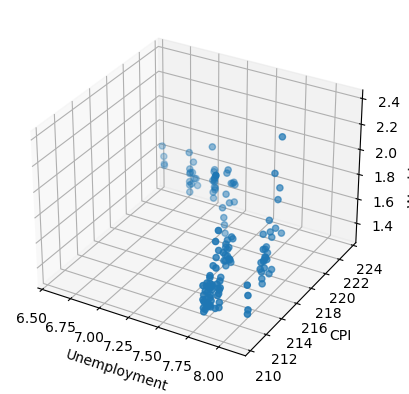

In [3]:
import numpy as np
import matplotlib.pyplot as pl

pl =  pl.axes(projection='3d')

pl.set_xlabel('Unemployment')
pl.set_ylabel('CPI')
pl.set_zlabel('Weekly_Sales')

pl.scatter(df_datos['Unemployment'], df_datos['CPI'], df_datos['Weekly_Sales'])

# pl.legend()


## 3.2 Regresión Lineal

### 3.2.1 Regresión Lineal Simple sobre la variable independiente Temperature (x) para obtener la variable dependiente Weekly_Sales (y)

MODELO GENERADO:
Intersección con el eje de las y (w0):  [1707842.99401655]
Pendiente (w1):  [[-2257.19326011]]

MÉTRICAS DE EVALUACIÓN DEL MODELO DE REGRESIÓN SOBRE LOS DATOS DE PRUEBA:
Máximo Error Absoluto (M):  670600.9847384186
Mean Absolute Error (MAE):  104771.95777793648
Mean Squared Error (MSE):  28888749469.95172
Suma de los Cuadrados de los Residuos (RSS):  808884985158.6482
Raíz de Mean Squared Error (RMSE):  169966.90698471782
Coeficiente de Determinación (R^2):  0.05490334737149638


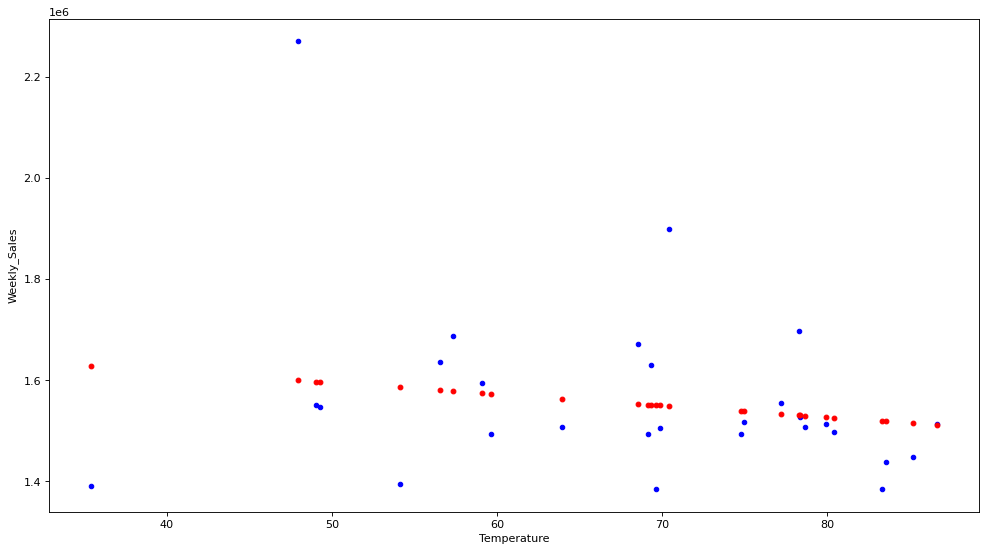

In [4]:
from sklearn import linear_model
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import r2_score
import pandas as pd

df_datos = pd.read_csv("datos/walmart.csv")

# LinearRegression exige que los datos de x e y no tengan valores ausentes
df_datos = df_datos.dropna(subset=['Temperature','Weekly_Sales'])
df_datos = df_datos.reset_index(drop=True)

# Se crean los conjuntos de datos de entrenamiento y de prueba
df_X = pd.DataFrame(df_datos, columns=['Temperature'])
df_y = pd.DataFrame(df_datos, columns=['Weekly_Sales'])
df_X_train,df_X_test,df_y_train,df_y_test = train_test_split(df_X,df_y,test_size=0.2,random_state=100)

# los datos de x se deben almacenar en un array de arrays, ya que puede haber varias variables x (Regresión Lineal Múltiple)
arr_X_train = df_X_train['Temperature'].values.reshape((-1,1))
arr_X_test = df_X_test['Temperature'].values.reshape((-1,1))

# Se crea el modelo de regresión lineal a partir de los datos de entrenamiento
regresion_lineal = linear_model.LinearRegression()
modelo_regresion_lineal = regresion_lineal.fit(arr_X_train, df_y_train)
print('MODELO GENERADO:')
print('Intersección con el eje de las y (w0): ', modelo_regresion_lineal.intercept_)
print('Pendiente (w1): ', modelo_regresion_lineal.coef_)

# Se predicen las salidas de datos de prueba 
arr_y_test_predicho = modelo_regresion_lineal.predict(arr_X_test)

# Se calculan las métricas para evaluar el modelo de regresión
print('\nMÉTRICAS DE EVALUACIÓN DEL MODELO DE REGRESIÓN SOBRE LOS DATOS DE PRUEBA:')
m = max_error(df_y_test,arr_y_test_predicho)
print('Máximo Error Absoluto (M): ', m)
mae = mean_absolute_error(df_y_test,arr_y_test_predicho)
print('Mean Absolute Error (MAE): ', mae)
mse = mean_squared_error(df_y_test,arr_y_test_predicho)
print('Mean Squared Error (MSE): ', mse)
rss = mean_squared_error(df_y_test,arr_y_test_predicho) * len(arr_y_test_predicho)
print('Suma de los Cuadrados de los Residuos (RSS): ', rss)
rmse = mean_squared_error(df_y_test,arr_y_test_predicho,squared=False)
print('Raíz de Mean Squared Error (RMSE): ', rmse)
r2 = r2_score(df_y_test,arr_y_test_predicho)
print('Coeficiente de Determinación (R^2): ', r2)

# Se genera un gráfico de dispersión con los valores predichos por la prueba del modelo y los valores reales
pl.figure(figsize=(15, 8), dpi = 80)
pl.xlabel('Temperature')
pl.ylabel('Weekly_Sales')
pl.scatter(arr_X_test, df_y_test, s=16, color='blue')
pl.scatter(arr_X_test, arr_y_test_predicho, s=18, color='red')
# pl.plot(arr_X_test, arr_y_predicho, color='yellow')


### 3.2.2 Regresión Lineal Múltiple sobre las variables independientes Temperature (x1) y Fuel_Price (x2) para obtener la variable dependiente Weekly_Sales (y)

MODELO GENERADO:
Intersección con el eje de las y (w0):  [1619828.30671252]
Coeficientes (w1 y w2):  [[-2827.3291097  40342.15444141]]

MÉTRICAS DE EVALUACIÓN DEL MODELO DE REGRESIÓN SOBRE LOS DATOS DE PRUEBA:
Máximo Error Absoluto (M):  322006.0395517987
Mean Absolute Error (MAE):  92455.95388522935
Mean Squared Error (MSE):  14369684125.073118
Suma de los Cuadrados de los Residuos (RSS):  402351155502.0473
Raíz de Mean Squared Error (RMSE):  119873.61730202821
Coeficiente de Determinación (R^2):  0.18332582028348843


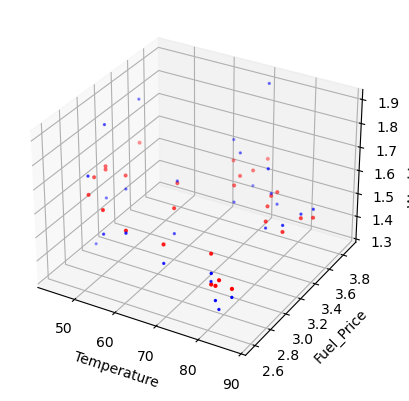

In [5]:
from sklearn import linear_model
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import r2_score
import pandas as pd

df_datos = pd.read_csv("datos/walmart.csv")

# LinearRegression exige que los datos de x e y no tengan valores ausentes
df_datos = df_datos.dropna(subset=['Temperature','Fuel_Price','Weekly_Sales'])
df_datos = df_datos.reset_index(drop=True)

# Se crean los conjuntos de datos de entrenamiento y de prueba
df_X = pd.DataFrame(df_datos, columns=['Temperature','Fuel_Price'])
df_y = pd.DataFrame(df_datos, columns=['Weekly_Sales'])
df_X_train,df_X_test,df_y_train,df_y_test = train_test_split(df_X,df_y,test_size=0.2,random_state=100)

# los datos de x se deben almacenar en un array de arrays, ya que puede haber varias variables x (Regresión Lineal Múltiple)
arr_X_train = df_X_train.values.reshape((-1,2))
arr_X_test = df_X_test.values.reshape((-1,2))

# Se crea el modelo de regresión lineal a partir de los datos de entrenamiento
regresion_lineal = linear_model.LinearRegression()
modelo_regresion_lineal = regresion_lineal.fit(arr_X_train, df_y_train)
print('MODELO GENERADO:')
print('Intersección con el eje de las y (w0): ', modelo_regresion_lineal.intercept_)
print('Coeficientes (w1 y w2): ', modelo_regresion_lineal.coef_)

# Se predicen las salidas de datos de prueba 
arr_y_test_predicho = modelo_regresion_lineal.predict(arr_X_test)

# Se calculan las métricas para evaluar el modelo de regresión
print('\nMÉTRICAS DE EVALUACIÓN DEL MODELO DE REGRESIÓN SOBRE LOS DATOS DE PRUEBA:')
m = max_error(df_y_test,arr_y_test_predicho)
print('Máximo Error Absoluto (M): ', m)
mae = mean_absolute_error(df_y_test,arr_y_test_predicho)
print('Mean Absolute Error (MAE): ', mae)
mse = mean_squared_error(df_y_test,arr_y_test_predicho)
print('Mean Squared Error (MSE): ', mse)
rss = mean_squared_error(df_y_test,arr_y_test_predicho) * len(arr_y_test_predicho)
print('Suma de los Cuadrados de los Residuos (RSS): ', rss)
rmse = mean_squared_error(df_y_test,arr_y_test_predicho,squared=False)
print('Raíz de Mean Squared Error (RMSE): ', rmse)
r2 = r2_score(df_y_test,arr_y_test_predicho)
print('Coeficiente de Determinación (R^2): ', r2)

# Se genera un gráfico de dispersión con los valores predichos por la prueba del modelo y los valores reales
pl =  pl.axes(projection='3d')
pl.set_xlabel('Temperature')
pl.set_ylabel('Fuel_Price')
pl.set_zlabel('Weekly_Sales')
pl.scatter(df_X_test['Temperature'], df_X_test['Fuel_Price'], df_y_test,  s=2, color='blue')
pl.scatter(df_X_test['Temperature'], df_X_test['Fuel_Price'], arr_y_test_predicho,  s=4, color='red')


### 3.2.3 Regresión Lineal Múltiple sobre las variables independientes Temperature (x1) y Fuel_Price (x2) normalizadas para obtener la variable dependiente Weekly_Sales (y)

MODELO GENERADO:
Intersección con el eje de las y (w0):  [1622532.66574602]
Coeficientes (w1 y w2):  [[-159037.26242038   54824.98788588]]

MÉTRICAS DE EVALUACIÓN DEL MODELO DE REGRESIÓN SOBRE LOS DATOS DE PRUEBA:
Máximo Error Absoluto (M):  322006.0395517987
Mean Absolute Error (MAE):  92455.95388522933
Mean Squared Error (MSE):  14369684125.073116
Suma de los Cuadrados de los Residuos (RSS):  402351155502.04724
Raíz de Mean Squared Error (RMSE):  119873.6173020282
Coeficiente de Determinación (R^2):  0.18332582028348854


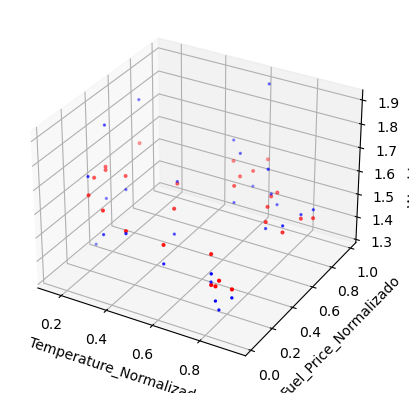

In [6]:
from sklearn import linear_model
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import r2_score
import pandas as pd

df_datos = pd.read_csv("datos/walmart.csv")

# LinearRegression exige que los datos de x e y no tengan valores ausentes
df_datos = df_datos.dropna(subset=['Temperature','Fuel_Price','Weekly_Sales'])
df_datos = df_datos.reset_index(drop=True)

# Generamos dos nuevas columnas que almacenarán los datos de Temperature y Fuel_Price normalizados
arr_columnas_normalizadas = MinMaxScaler().fit_transform(df_datos[['Temperature','Fuel_Price']])
df_columnas_normalizadas = pd.DataFrame(arr_columnas_normalizadas, 
                                        columns=['Temperature_Normalizado','Fuel_Price_Normalizado'])
df_datos = df_datos.join(df_columnas_normalizadas)

# Se crean los conjuntos de datos de entrenamiento y de prueba
df_X = pd.DataFrame(df_datos, columns=['Temperature_Normalizado','Fuel_Price_Normalizado'])
df_y = pd.DataFrame(df_datos, columns=['Weekly_Sales'])
df_X_train,df_X_test,df_y_train,df_y_test = train_test_split(df_X,df_y,test_size=0.2,random_state=100)

# los datos de x se deben almacenar en un array de arrays, ya que puede haber varias variables x (Regresión Lineal Múltiple)
arr_X_train = df_X_train.values.reshape((-1,2))
arr_X_test = df_X_test.values.reshape((-1,2))

# Se crea el modelo de regresión lineal a partir de los datos de entrenamiento
regresion_lineal = linear_model.LinearRegression()
modelo_regresion_lineal = regresion_lineal.fit(arr_X_train, df_y_train)
print('MODELO GENERADO:')
print('Intersección con el eje de las y (w0): ', modelo_regresion_lineal.intercept_)
print('Coeficientes (w1 y w2): ', modelo_regresion_lineal.coef_)

# Se predicen las salidas de datos de prueba 
arr_y_test_predicho = modelo_regresion_lineal.predict(arr_X_test)

# Se calculan las métricas para evaluar el modelo de regresión
print('\nMÉTRICAS DE EVALUACIÓN DEL MODELO DE REGRESIÓN SOBRE LOS DATOS DE PRUEBA:')
m = max_error(df_y_test,arr_y_test_predicho)
print('Máximo Error Absoluto (M): ', m)
mae = mean_absolute_error(df_y_test,arr_y_test_predicho)
print('Mean Absolute Error (MAE): ', mae)
mse = mean_squared_error(df_y_test,arr_y_test_predicho)
print('Mean Squared Error (MSE): ', mse)
rss = mean_squared_error(df_y_test,arr_y_test_predicho) * len(arr_y_test_predicho)
print('Suma de los Cuadrados de los Residuos (RSS): ', rss)
rmse = mean_squared_error(df_y_test,arr_y_test_predicho,squared=False)
print('Raíz de Mean Squared Error (RMSE): ', rmse)
r2 = r2_score(df_y_test,arr_y_test_predicho)
print('Coeficiente de Determinación (R^2): ', r2)

# Se genera un gráfico de dispersión con los valores predichos por la prueba del modelo y los valores reales
pl =  pl.axes(projection='3d')
pl.set_xlabel('Temperature_Normalizado')
pl.set_ylabel('Fuel_Price_Normalizado')
pl.set_zlabel('Weekly_Sales')
pl.scatter(df_X_test['Temperature_Normalizado'], df_X_test['Fuel_Price_Normalizado'], df_y_test,  s=2, color='blue')
pl.scatter(df_X_test['Temperature_Normalizado'], df_X_test['Fuel_Price_Normalizado'], arr_y_test_predicho,  s=4, color='red')



## 3.3 Regresión Polinómica

### 3.3.1 Regresión Polinómica Simple sobre la variable independiente Temperature (x) para obtener la variable dependiente Weekly_Sales (y)

df_X_train: 
      Temperature
118        77.95
29         82.11
96         44.55
52         62.90
45         48.27
..           ...
87         66.57
103        45.32
67         83.13
24         87.00
8          64.84

[112 rows x 1 columns]
arr_X_train_poly_feat: 
 [[1.00000000e+00 7.79500000e+01 6.07620250e+03 4.73639985e+05]
 [1.00000000e+00 8.21100000e+01 6.74205210e+03 5.53589898e+05]
 [1.00000000e+00 4.45500000e+01 1.98470250e+03 8.84184964e+04]
 [1.00000000e+00 6.29000000e+01 3.95641000e+03 2.48858189e+05]
 [1.00000000e+00 4.82700000e+01 2.32999290e+03 1.12468757e+05]
 [1.00000000e+00 5.87600000e+01 3.45273760e+03 2.02882861e+05]
 [1.00000000e+00 4.89100000e+01 2.39218810e+03 1.17001920e+05]
 [1.00000000e+00 6.46100000e+01 4.17445210e+03 2.69711350e+05]
 [1.00000000e+00 7.76600000e+01 6.03107560e+03 4.68373331e+05]
 [1.00000000e+00 7.58000000e+01 5.74564000e+03 4.35519512e+05]
 [1.00000000e+00 6.71800000e+01 4.51315240e+03 3.03193578e+05]
 [1.00000000e+00 6.09600000e+01 3.716121

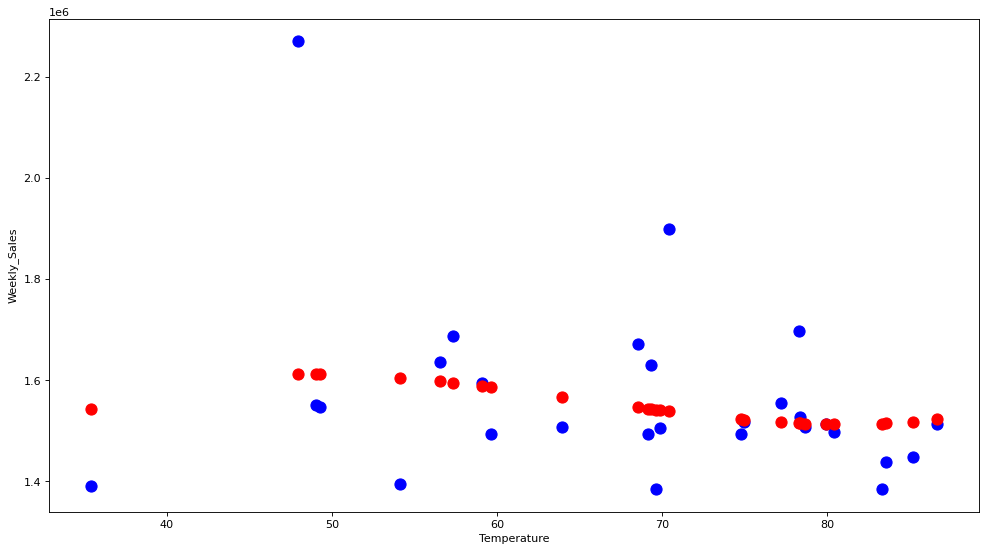

In [32]:
from sklearn import linear_model
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import r2_score
import pandas as pd

df_datos = pd.read_csv("datos/walmart.csv")

# LinearRegression exige que los datos de x e y no tengan valores ausentes
df_datos = df_datos.dropna(subset=['Temperature','Weekly_Sales'])
df_datos = df_datos.reset_index(drop=True)

# Se crean los conjuntos de datos de entrenamiento y de prueba
df_X = pd.DataFrame(df_datos, columns=['Temperature'])
df_y = pd.DataFrame(df_datos, columns=['Weekly_Sales'])
df_X_train,df_X_test,df_y_train,df_y_test = train_test_split(df_X,df_y,test_size=0.2,random_state=100)

# Se generan las características polinómicas como las potencias sucesivas de cada uno de los datos de entrenamiento y prueba de la variable independiente
# x^0 + x^1 + x^2 + x^3 + ... + x^n
poly_feat = PolynomialFeatures(degree=3)
arr_X_train_poly_feat = poly_feat.fit_transform(df_X_train)
arr_X_test_poly_feat = poly_feat.fit_transform(df_X_test)
print('df_X_train: \n', df_X_train)
print('arr_X_train_poly_feat: \n', arr_X_train_poly_feat)

# Se crea el modelo de regresión polinómica a partir de las características polinómicas y la variable objetivo
regresion_lineal = linear_model.LinearRegression()
modelo_regresion_lineal = regresion_lineal.fit(arr_X_train_poly_feat, df_y_train)
print('MODELO GENERADO:')
print('Intersección con el eje de las y (w0): ', modelo_regresion_lineal.intercept_)
print('Coeficientes: ', modelo_regresion_lineal.coef_)

# Se predicen las salidas de datos de prueba 
arr_y_test_predicho = modelo_regresion_lineal.predict(arr_X_test_poly_feat)

# Se calculan las métricas para evaluar el modelo de regresión
print('\nMÉTRICAS DE EVALUACIÓN DEL MODELO DE REGRESIÓN SOBRE LOS DATOS DE PRUEBA:')
m = max_error(df_y_test,arr_y_test_predicho)
print('Máximo Error Absoluto (M): ', m)
mae = mean_absolute_error(df_y_test,arr_y_test_predicho)
print('Mean Absolute Error (MAE): ', mae)
mse = mean_squared_error(df_y_test,arr_y_test_predicho)
print('Mean Squared Error (MSE): ', mse)
rss = mean_squared_error(df_y_test,arr_y_test_predicho) * len(arr_y_test_predicho)
print('Suma de los Cuadrados de los Residuos (RSS): ', rss)
rmse = mean_squared_error(df_y_test,arr_y_test_predicho,squared=False)
print('Raíz de Mean Squared Error (RMSE): ', rmse)
r2 = r2_score(df_y_test,arr_y_test_predicho)
print('Coeficiente de Determinación (R^2): ', r2)

# Se genera un gráfico de dispersión con los valores predichos por la prueba del modelo y los valores reales
pl.figure(figsize=(15, 8), dpi = 80)
pl.xlabel('Temperature')
pl.ylabel('Weekly_Sales')
pl.scatter(df_X_test, df_y_test, s=100, color='blue')
pl.scatter(df_X_test, arr_y_test_predicho, s=100, color='red')


### 3.3.2 Regresión Polinómica Múltiple sobre las variables independientes Temperature (x1) y Fuel_Price (x2) para obtener la variable dependiente Weekly_Sales (y)

df_X_train: 
      Temperature  Fuel_Price
117        77.95       3.501
29         80.94       2.624
54         62.76       3.488
52         59.58       3.288
45         35.40       2.983
..           ...         ...
87         54.98       3.332
103        57.25       3.555
67         86.41       3.637
24         86.65       2.664
8          67.41       2.780

[111 rows x 2 columns]
arr_X_train_poly_feat: 
 [[1.0000000e+00 7.7950000e+01 3.5010000e+00 6.0762025e+03 2.7290295e+02
  1.2257001e+01]
 [1.0000000e+00 8.0940000e+01 2.6240000e+00 6.5512836e+03 2.1238656e+02
  6.8853760e+00]
 [1.0000000e+00 6.2760000e+01 3.4880000e+00 3.9388176e+03 2.1890688e+02
  1.2166144e+01]
 [1.0000000e+00 5.9580000e+01 3.2880000e+00 3.5497764e+03 1.9589904e+02
  1.0810944e+01]
 [1.0000000e+00 3.5400000e+01 2.9830000e+00 1.2531600e+03 1.0559820e+02
  8.8982890e+00]
 [1.0000000e+00 5.8760000e+01 3.6690000e+00 3.4527376e+03 2.1559044e+02
  1.3461561e+01]
 [1.0000000e+00 6.0960000e+01 3.6300000e+00 3.7161216e+

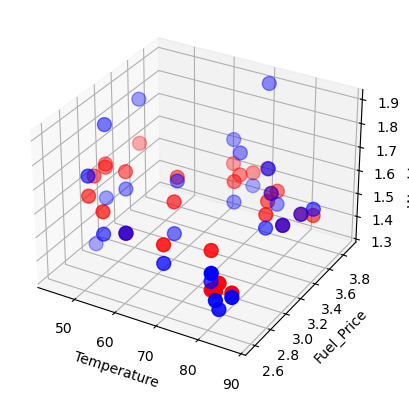

In [35]:
from sklearn import linear_model
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import r2_score
import pandas as pd

df_datos = pd.read_csv("datos/walmart.csv")

# LinearRegression exige que los datos de x e y no tengan valores ausentes
df_datos = df_datos.dropna(subset=['Temperature','Fuel_Price','Weekly_Sales'])
df_datos = df_datos.reset_index(drop=True)

# Se crean los conjuntos de datos de entrenamiento y de prueba
df_X = pd.DataFrame(df_datos, columns=['Temperature','Fuel_Price'])
df_y = pd.DataFrame(df_datos, columns=['Weekly_Sales'])
df_X_train,df_X_test,df_y_train,df_y_test = train_test_split(df_X,df_y,test_size=0.2,random_state=100)

# Se generan las características polinómicas como las potencias sucesivas de la suma de ambas variables independientes tanto en los datos de prueba como en los de entrenamiento
# (x1+x2)^0 + (x1+x2)^1 + (x1+x2)^2 + (x1+x2)^3 + ... + (x1+x2)^n
poly_feat = PolynomialFeatures(degree=2) 
arr_X_train_poly_feat = poly_feat.fit_transform(df_X_train)
arr_X_test_poly_feat = poly_feat.fit_transform(df_X_test)
print('df_X_train: \n', df_X_train)
print('arr_X_train_poly_feat: \n', arr_X_train_poly_feat)

# Se crea el modelo de regresión polinómica a partir de las características polinómicas y la variable objetivo
regresion_lineal = linear_model.LinearRegression()
modelo_regresion_lineal = regresion_lineal.fit(arr_X_train_poly_feat, df_y_train)
print('MODELO GENERADO:')
print('Intersección con el eje de las y (w0): ', modelo_regresion_lineal.intercept_)
print('Coeficientes: ', modelo_regresion_lineal.coef_)

# Se predicen las salidas de datos de prueba 
arr_y_test_predicho = modelo_regresion_lineal.predict(arr_X_test_poly_feat)

# Se calculan las métricas para evaluar el modelo de regresión
print('\nMÉTRICAS DE EVALUACIÓN DEL MODELO DE REGRESIÓN SOBRE LOS DATOS DE PRUEBA:')
m = max_error(df_y_test,arr_y_test_predicho)
print('Máximo Error Absoluto (M): ', m)
mae = mean_absolute_error(df_y_test,arr_y_test_predicho)
print('Mean Absolute Error (MAE): ', mae)
mse = mean_squared_error(df_y_test,arr_y_test_predicho)
print('Mean Squared Error (MSE): ', mse)
rss = mean_squared_error(df_y_test,arr_y_test_predicho) * len(arr_y_test_predicho)
print('Suma de los Cuadrados de los Residuos (RSS): ', rss)
rmse = mean_squared_error(df_y_test,arr_y_test_predicho,squared=False)
print('Raíz de Mean Squared Error (RMSE): ', rmse)
r2 = r2_score(df_y_test,arr_y_test_predicho)
print('Coeficiente de Determinación (R^2): ', r2)

# Se genera un gráfico de dispersión con los valores predichos por la prueba del modelo y los valores reales
pl =  pl.axes(projection='3d')
pl.set_xlabel('Temperature')
pl.set_ylabel('Fuel_Price')
pl.set_zlabel('Weekly_Sales')
pl.scatter(df_X_test['Temperature'], df_X_test['Fuel_Price'], df_y_test,  s=100, color='blue')
pl.scatter(df_X_test['Temperature'], df_X_test['Fuel_Price'], arr_y_test_predicho,  s=100, color='red')



### 3.3.3 Regresión Polinómica Múltiple sobre las variables independientes Temperature (x1) y Weekly_Discounts codificada con One-Hot (x2, x3, x4) para obtener la variable dependiente Weekly_Sales (y)

In [9]:
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import r2_score
import pandas as pd

df_datos = pd.read_csv("datos/walmart.csv")

# LinearRegression exige que los datos de x e y no tengan valores ausentes
df_datos = df_datos.dropna(subset=['Temperature','Weekly_Discounts','Weekly_Sales'])
df_datos = df_datos.reset_index(drop=True)

# Se aplica la codificación One-Hot a la columna Weekly_Discounts añadiendo las nuevas columnas al dataframe de datos
codificador_one_hot = OneHotEncoder()
codificacion_one_hot = codificador_one_hot.fit_transform(df_datos[['Weekly_Discounts']])
arr_nombre_nuevas_columnas = 'Weekly_Discounts_' + codificador_one_hot.categories_[0]
df_nuevas_columnas_one_hot = pd.DataFrame(codificacion_one_hot.toarray(),columns=arr_nombre_nuevas_columnas)
df_datos = df_datos.join(df_nuevas_columnas_one_hot)

# Se crea una lista con los nombres de las columnas que almacenan las variables independientes
list_nombre_nuevas_columnas = list(arr_nombre_nuevas_columnas)
list_columnas_X = ['Temperature'] + list_nombre_nuevas_columnas

# Se crean los conjuntos de datos de entrenamiento y de prueba
df_X = pd.DataFrame(df_datos, columns=list_columnas_X)
df_y = pd.DataFrame(df_datos, columns=['Weekly_Sales'])
df_X_train,df_X_test,df_y_train,df_y_test = train_test_split(df_X,df_y,test_size=0.2,random_state=100)

# Se generan las características polinómicas
poly_feat = PolynomialFeatures(degree=2)
arr_X_train_poly_feat = poly_feat.fit_transform(df_X_train)
arr_X_test_poly_feat = poly_feat.fit_transform(df_X_test)

# Se crea el modelo de regresión polinómica a partir de las características polinómicas y la variable objetivo
regresion_lineal = linear_model.LinearRegression()
modelo_regresion_lineal = regresion_lineal.fit(arr_X_train_poly_feat, df_y_train)
print('MODELO GENERADO:')
print('Intersección con el eje de las y (w0): ', modelo_regresion_lineal.intercept_)
print('Coeficientes: ', modelo_regresion_lineal.coef_)

# Se predicen las salidas de datos de prueba 
arr_y_test_predicho = modelo_regresion_lineal.predict(arr_X_test_poly_feat)

# Se calculan las métricas para evaluar el modelo de regresión
print('\nMÉTRICAS DE EVALUACIÓN DEL MODELO DE REGRESIÓN SOBRE LOS DATOS DE PRUEBA:')
m = max_error(df_y_test,arr_y_test_predicho)
print('Máximo Error Absoluto (M): ', m)
mae = mean_absolute_error(df_y_test,arr_y_test_predicho)
print('Mean Absolute Error (MAE): ', mae)
mse = mean_squared_error(df_y_test,arr_y_test_predicho)
print('Mean Squared Error (MSE): ', mse)
rss = mean_squared_error(df_y_test,arr_y_test_predicho) * len(arr_y_test_predicho)
print('Suma de los Cuadrados de los Residuos (RSS): ', rss)
rmse = mean_squared_error(df_y_test,arr_y_test_predicho,squared=False)
print('Raíz de Mean Squared Error (RMSE): ', rmse)
r2 = r2_score(df_y_test,arr_y_test_predicho)
print('Coeficiente de Determinación (R^2): ', r2)


MODELO GENERADO:
Intersección con el eje de las y (w0):  [1805740.47092814]
Pendiente (w1):  [[ 0.00000000e+00 -3.86878909e+03  4.45466813e+04  4.06264686e+04
  -8.51731499e+04  2.02838854e+01 -2.38194957e+03 -2.72636723e+03
   1.23952771e+03  4.45466813e+04  2.97176642e-24 -2.50380297e-36
   4.06264686e+04  0.00000000e+00 -8.51731499e+04]]

MÉTRICAS DE EVALUACIÓN DEL MODELO DE REGRESIÓN SOBRE LOS DATOS DE PRUEBA:
Máximo Error Absoluto (M):  652843.0645073452
Mean Absolute Error (MAE):  103933.11864605486
Mean Squared Error (MSE):  29474744170.21368
Suma de los Cuadrados de los Residuos (RSS):  825292836765.983
Raíz de Mean Squared Error (RMSE):  171682.1020672035
Coeficiente de Determinación (R^2):  0.03573250613270651


### 3.3.4 Regresión Polinómica Múltiple sobre las variables independientes Temperature Estandarizada (x1) y Weekly_Discounts codificada con One-Hot (x2, x3, x4) para obtener la variable dependiente Weekly_Sales (y)

In [36]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import r2_score
import pandas as pd

df_datos = pd.read_csv("datos/walmart.csv")

# LinearRegression exige que los datos de x e y no tengan valores ausentes
df_datos = df_datos.dropna(subset=['Temperature','Weekly_Discounts','Weekly_Sales'])
df_datos = df_datos.reset_index(drop=True)

# Se estandariza la columna Temperature
arr_estandarizado = StandardScaler().fit_transform(df_datos[['Temperature']])
df_estandarizado = pd.DataFrame(arr_estandarizado,
                                columns=['Temperature_Estandarizado'])
df_datos = df_datos.join(df_estandarizado)

# Se aplica la codificación One-Hot a la columna Weekly_Discounts añadiendo las nuevas columnas al dataframe de datos
codificador_one_hot = OneHotEncoder()
codificacion_one_hot = codificador_one_hot.fit_transform(df_datos[['Weekly_Discounts']])
arr_nombre_nuevas_columnas = 'Weekly_Discounts_' + codificador_one_hot.categories_[0]
df_nuevas_columnas_one_hot = pd.DataFrame(codificacion_one_hot.toarray(),columns=arr_nombre_nuevas_columnas)
df_datos = df_datos.join(df_nuevas_columnas_one_hot)

# Se crea una lista con los nombres de las columnas que almacenan las variables independientes
list_nombre_nuevas_columnas = list(arr_nombre_nuevas_columnas)
list_columnas_X = ['Temperature_Estandarizado'] + list_nombre_nuevas_columnas

# Se crean los conjuntos de datos de entrenamiento y de prueba
df_X = pd.DataFrame(df_datos, columns=list_columnas_X)
df_y = pd.DataFrame(df_datos, columns=['Weekly_Sales'])
df_X_train,df_X_test,df_y_train,df_y_test = train_test_split(df_X,df_y,test_size=0.2,random_state=100)

# Se generan las características polinómicas
poly_feat = PolynomialFeatures(degree=2)
arr_X_train_poly_feat = poly_feat.fit_transform(df_X_train)
arr_X_test_poly_feat = poly_feat.fit_transform(df_X_test)

# Se crea el modelo de regresión polinómica a partir de las características polinómicas y la variable objetivo
regresion_lineal = linear_model.LinearRegression()
modelo_regresion_lineal = regresion_lineal.fit(arr_X_train_poly_feat, df_y_train)
print('MODELO GENERADO:')
print('Intersección con el eje de las y (w0): ', modelo_regresion_lineal.intercept_)
print('Coeficientes: ', modelo_regresion_lineal.coef_)

# Se predicen las salidas de datos de prueba 
arr_y_test_predicho = modelo_regresion_lineal.predict(arr_X_test_poly_feat)

# Se calculan las métricas para evaluar el modelo de regresión
print('\nMÉTRICAS DE EVALUACIÓN DEL MODELO DE REGRESIÓN SOBRE LOS DATOS DE PRUEBA:')
m = max_error(df_y_test,arr_y_test_predicho)
print('Máximo Error Absoluto (M): ', m)
mae = mean_absolute_error(df_y_test,arr_y_test_predicho)
print('Mean Absolute Error (MAE): ', mae)
mse = mean_squared_error(df_y_test,arr_y_test_predicho)
print('Mean Squared Error (MSE): ', mse)
rss = mean_squared_error(df_y_test,arr_y_test_predicho) * len(arr_y_test_predicho)
print('Suma de los Cuadrados de los Residuos (RSS): ', rss)
rmse = mean_squared_error(df_y_test,arr_y_test_predicho,squared=False)
print('Raíz de Mean Squared Error (RMSE): ', rmse)
r2 = r2_score(df_y_test,arr_y_test_predicho)
print('Coeficiente de Determinación (R^2): ', r2)


MODELO GENERADO:
Intersección con el eje de las y (w0):  [1546735.59457441]
Coeficientes:  [[ 0.00000000e+00 -2.45616152e+04  6.94191495e+03 -8.83503549e+03
   1.89312054e+03  3.88853384e+03 -2.33116852e+04 -2.80804157e+04
   2.68304856e+04  6.94191495e+03  8.33171797e-26  4.82365944e-38
  -8.83503549e+03  0.00000000e+00  1.89312054e+03]]

MÉTRICAS DE EVALUACIÓN DEL MODELO DE REGRESIÓN SOBRE LOS DATOS DE PRUEBA:
Máximo Error Absoluto (M):  652843.0645073482
Mean Absolute Error (MAE):  103933.11864605437
Mean Squared Error (MSE):  29474744170.2136
Suma de los Cuadrados de los Residuos (RSS):  825292836765.9808
Raíz de Mean Squared Error (RMSE):  171682.10206720326
Coeficiente de Determinación (R^2):  0.03573250613270906


## 3.4 Regresión de los K-Vecinos Más Cercanos (KNN)

### 3.4.1 Regresión de los K-Vecinos Más Cercanos sobre la variable independiente Temperature Normalizada (x1) para obtener la variable dependiente Normalizada Weekly_Sales (y)


MÉTRICAS DE EVALUACIÓN DEL MODELO DE REGRESIÓN SOBRE LOS DATOS DE PRUEBA:
Máximo Error Absoluto (M):  331174.7549999999
Mean Absolute Error (MAE):  122641.51428571434
Mean Squared Error (MSE):  25120753758.144855
Suma de los Cuadrados de los Residuos (RSS):  703381105228.0559
Raíz de Mean Squared Error (RMSE):  158495.27992386668
Coeficiente de Determinación (R^2):  -0.4276911580468743


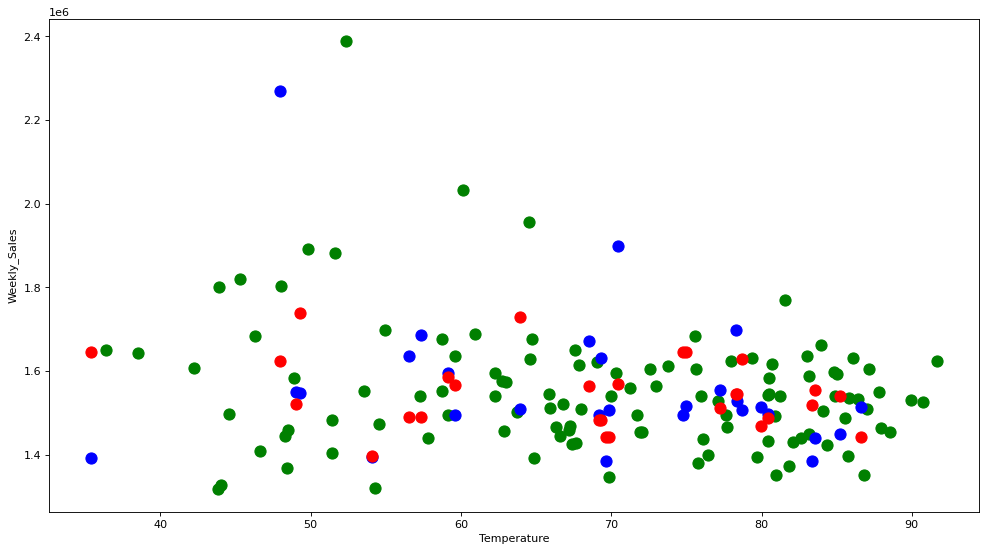

In [6]:
from sklearn import linear_model
import matplotlib.pyplot as pl
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import r2_score
import pandas as pd

df_datos = pd.read_csv("datos/walmart.csv")

# KNeighborsRegressor exige que los datos de x e y no tengan valores ausentes
df_datos = df_datos.dropna(subset=['Temperature','Weekly_Sales'])
df_datos = df_datos.reset_index(drop=True)

# Se normalizan tanto la variable independiente Temperature como la variable dependiente Weekly_Sales
escalador_min_max_temperature = MinMaxScaler()
escalador_min_max_weekly_sales = MinMaxScaler()
arr_temperature_normalizado = escalador_min_max_temperature.fit_transform(df_datos[['Temperature']])
arr_weekly_sales_normalizado = escalador_min_max_weekly_sales.fit_transform(df_datos[['Weekly_Sales']])

# Se crean los conjuntos de datos de entrenamiento y de prueba
df_X_normalizado = pd.DataFrame(arr_temperature_normalizado, columns=['Temperature_Normalizado'])
df_y_normalizado = pd.DataFrame(arr_weekly_sales_normalizado, columns=['Weekly_Sales_Normalizado'])
df_X_train_normalizado,df_X_test_normalizado,df_y_train_normalizado,df_y_test_normalizado = train_test_split(df_X_normalizado,df_y_normalizado,test_size=0.2,random_state=100)

# Se crea el modelo de regresión KNN a partir de los datos de entrenamiento
regresion_knn = KNeighborsRegressor(n_neighbors=2)
modelo_regresion_knn = regresion_knn.fit(df_X_train_normalizado, df_y_train_normalizado)

# Se predicen las salidas de datos de prueba 
arr_y_test_predicho_normalizado = modelo_regresion_knn.predict(df_X_test_normalizado)

# Se desnormalizan los datos
arr_y_test_predicho = escalador_min_max_weekly_sales.inverse_transform(arr_y_test_predicho_normalizado)
arr_y_test = escalador_min_max_weekly_sales.inverse_transform(df_y_test_normalizado)
arr_X_test = escalador_min_max_temperature.inverse_transform(df_X_test_normalizado)
arr_X_train = escalador_min_max_temperature.inverse_transform(df_X_train_normalizado)
arr_y_train = escalador_min_max_weekly_sales.inverse_transform(df_y_train_normalizado)


# Se calculan las métricas para evaluar el modelo de regresión
print('\nMÉTRICAS DE EVALUACIÓN DEL MODELO DE REGRESIÓN SOBRE LOS DATOS DE PRUEBA:')
m = max_error(df_y_test,arr_y_test_predicho)
print('Máximo Error Absoluto (M): ', m)
mae = mean_absolute_error(df_y_test,arr_y_test_predicho)
print('Mean Absolute Error (MAE): ', mae)
mse = mean_squared_error(df_y_test,arr_y_test_predicho)
print('Mean Squared Error (MSE): ', mse)
rss = mean_squared_error(df_y_test,arr_y_test_predicho) * len(arr_y_test_predicho)
print('Suma de los Cuadrados de los Residuos (RSS): ', rss)
rmse = mean_squared_error(df_y_test,arr_y_test_predicho,squared=False)
print('Raíz de Mean Squared Error (RMSE): ', rmse)
r2 = r2_score(df_y_test,arr_y_test_predicho)
print('Coeficiente de Determinación (R^2): ', r2)

# Se genera un gráfico de dispersión con los valores de entrenamiento, los valores predichos por la prueba del modelo y los valores reales de prueba
pl.figure(figsize=(15, 8), dpi = 80)
pl.xlabel('Temperature')
pl.ylabel('Weekly_Sales')
pl.scatter(arr_X_train, arr_y_train, s=100, color='green')
pl.scatter(arr_X_test, arr_y_test, s=100, color='blue')
pl.scatter(arr_X_test, arr_y_test_predicho, s=100, color='red')



### 3.4.2 Regresión de los K-Vecinos Más Cercanos sobre las variables independientes Temperature Normalizada (x1) y Fuel_Price Normalizado (x2) para obtener la variable dependiente Normalizada Weekly_Sales (y)


MÉTRICAS DE EVALUACIÓN DEL MODELO DE REGRESIÓN SOBRE LOS DATOS DE PRUEBA:
Máximo Error Absoluto (M):  429673.75000000023
Mean Absolute Error (MAE):  127184.88000000002
Mean Squared Error (MSE):  32460118670.74936
Suma de los Cuadrados de los Residuos (RSS):  908883322780.982
Raíz de Mean Squared Error (RMSE):  180166.91891340475
Coeficiente de Determinación (R^2):  -0.8448102657093004


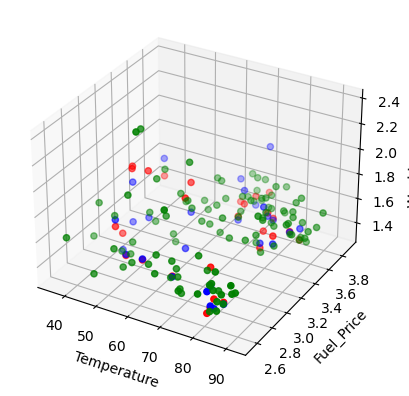

In [20]:
from sklearn import linear_model
import matplotlib.pyplot as pl
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np

df_datos = pd.read_csv("datos/walmart.csv")

# KNeighborsRegressor exige que los datos de x e y no tengan valores ausentes
df_datos = df_datos.dropna(subset=['Temperature','Fuel_Price','Weekly_Sales'])
df_datos = df_datos.reset_index(drop=True)

# Se normalizan tanto la variable independiente Temperature como la variable dependiente Weekly_Sales
escalador_min_max_temperature = MinMaxScaler()
escalador_min_max_fuel_price = MinMaxScaler()
escalador_min_max_weekly_sales = MinMaxScaler()
arr_temperature_normalizado = escalador_min_max_temperature.fit_transform(df_datos[['Temperature']])
arr_fuel_price_normalizado = escalador_min_max_fuel_price.fit_transform(df_datos[['Fuel_Price']])
arr_weekly_sales_normalizado = escalador_min_max_weekly_sales.fit_transform(df_datos[['Weekly_Sales']])

# Se crean los conjuntos de datos de entrenamiento y de prueba
df_X_normalizado = pd.DataFrame(arr_temperature_normalizado, columns=['Temperature_Normalizado'])
df_fuel_price_normalizado = pd.DataFrame(arr_fuel_price_normalizado, columns=['Fuel_Price_Normalizado'])
df_X_normalizado = df_X_normalizado.join(df_fuel_price_normalizado)
df_y_normalizado = pd.DataFrame(arr_weekly_sales_normalizado, columns=['Weekly_Sales_Normalizado'])
df_X_train_normalizado,df_X_test_normalizado,df_y_train_normalizado,df_y_test_normalizado = train_test_split(df_X_normalizado,df_y_normalizado,test_size=0.2,random_state=100)

# Se crea el modelo de regresión KNN a partir de los datos de entrenamiento
regresion_knn = KNeighborsRegressor(n_neighbors=2)
modelo_regresion_knn = regresion_knn.fit(df_X_train_normalizado, df_y_train_normalizado)

# Se predicen las salidas de datos de prueba 
arr_y_test_predicho_normalizado = modelo_regresion_knn.predict(df_X_test_normalizado)

# Se desnormalizan los datos
arr_y_test_predicho = escalador_min_max_weekly_sales.inverse_transform(arr_y_test_predicho_normalizado)
arr_y_test = escalador_min_max_weekly_sales.inverse_transform(df_y_test_normalizado)
arr_X_test = escalador_min_max_temperature.inverse_transform(df_X_test_normalizado[['Temperature_Normalizado']])
arr_X_test = np.append(arr_X_test, escalador_min_max_fuel_price.inverse_transform(df_X_test_normalizado[['Fuel_Price_Normalizado']]), axis=1)
df_X_test = pd.DataFrame(arr_X_test, columns=['Temperature','Fuel_Price'])
arr_X_train = escalador_min_max_temperature.inverse_transform(df_X_train_normalizado[['Temperature_Normalizado']])
arr_X_train = np.append(arr_X_train, escalador_min_max_fuel_price.inverse_transform(df_X_train_normalizado[['Fuel_Price_Normalizado']]), axis=1)
df_X_train = pd.DataFrame(arr_X_train, columns=['Temperature','Fuel_Price'])
arr_y_train = escalador_min_max_weekly_sales.inverse_transform(df_y_train_normalizado)


# Se calculan las métricas para evaluar el modelo de regresión
print('\nMÉTRICAS DE EVALUACIÓN DEL MODELO DE REGRESIÓN SOBRE LOS DATOS DE PRUEBA:')
m = max_error(arr_y_test,arr_y_test_predicho)
print('Máximo Error Absoluto (M): ', m)
mae = mean_absolute_error(arr_y_test,arr_y_test_predicho)
print('Mean Absolute Error (MAE): ', mae)
mse = mean_squared_error(arr_y_test,arr_y_test_predicho)
print('Mean Squared Error (MSE): ', mse)
rss = mean_squared_error(arr_y_test,arr_y_test_predicho) * len(arr_y_test_predicho)
print('Suma de los Cuadrados de los Residuos (RSS): ', rss)
rmse = mean_squared_error(arr_y_test,arr_y_test_predicho,squared=False)
print('Raíz de Mean Squared Error (RMSE): ', rmse)
r2 = r2_score(arr_y_test,arr_y_test_predicho)
print('Coeficiente de Determinación (R^2): ', r2)

# Se genera un gráfico de dispersión con los valores de entrenamiento, los valores predichos por la prueba del modelo y los valores reales de prueba
pl =  pl.axes(projection='3d')
pl.set_xlabel('Temperature')
pl.set_ylabel('Fuel_Price')
pl.set_zlabel('Weekly_Sales')
pl.scatter(df_X_train['Temperature'], df_X_train['Fuel_Price'], df_y_train,  s=20, color='green')
pl.scatter(df_X_test['Temperature'], df_X_test['Fuel_Price'], arr_y_test,  s=20, color='blue')
pl.scatter(df_X_test['Temperature'], df_X_test['Fuel_Price'], arr_y_test_predicho,  s=20, color='red')




MÉTRICAS DE EVALUACIÓN DEL MODELO DE REGRESIÓN SOBRE LOS DATOS DE PRUEBA:
Máximo Error Absoluto (M):  429673.75000000023
Mean Absolute Error (MAE):  127184.88000000002
Mean Squared Error (MSE):  32460118670.74936
Suma de los Cuadrados de los Residuos (RSS):  908883322780.982
Raíz de Mean Squared Error (RMSE):  180166.91891340475
Coeficiente de Determinación (R^2):  -0.8448102657093004


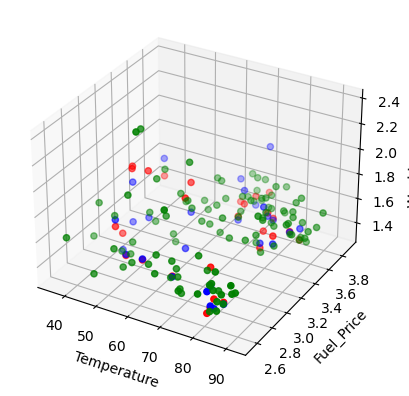

In [20]:
from sklearn import linear_model
import matplotlib.pyplot as pl
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np

df_datos = pd.read_csv("datos/walmart.csv")

# KNeighborsRegressor exige que los datos de x e y no tengan valores ausentes
df_datos = df_datos.dropna(subset=['Temperature','Fuel_Price','Weekly_Sales'])
df_datos = df_datos.reset_index(drop=True)

# Se normalizan tanto la variable independiente Temperature como la variable dependiente Weekly_Sales
escalador_min_max_temperature = MinMaxScaler()
escalador_min_max_fuel_price = MinMaxScaler()
escalador_min_max_weekly_sales = MinMaxScaler()
arr_temperature_normalizado = escalador_min_max_temperature.fit_transform(df_datos[['Temperature']])
arr_fuel_price_normalizado = escalador_min_max_fuel_price.fit_transform(df_datos[['Fuel_Price']])
arr_weekly_sales_normalizado = escalador_min_max_weekly_sales.fit_transform(df_datos[['Weekly_Sales']])

# Se crean los conjuntos de datos de entrenamiento y de prueba
df_X_normalizado = pd.DataFrame(arr_temperature_normalizado, columns=['Temperature_Normalizado'])
df_fuel_price_normalizado = pd.DataFrame(arr_fuel_price_normalizado, columns=['Fuel_Price_Normalizado'])
df_X_normalizado = df_X_normalizado.join(df_fuel_price_normalizado)
df_y_normalizado = pd.DataFrame(arr_weekly_sales_normalizado, columns=['Weekly_Sales_Normalizado'])
df_X_train_normalizado,df_X_test_normalizado,df_y_train_normalizado,df_y_test_normalizado = train_test_split(df_X_normalizado,df_y_normalizado,test_size=0.2,random_state=100)

# Se crea el modelo de regresión KNN a partir de los datos de entrenamiento
regresion_knn = KNeighborsRegressor(n_neighbors=2)
modelo_regresion_knn = regresion_knn.fit(df_X_train_normalizado, df_y_train_normalizado)

# Se predicen las salidas de datos de prueba 
arr_y_test_predicho_normalizado = modelo_regresion_knn.predict(df_X_test_normalizado)

# Se desnormalizan los datos
arr_y_test_predicho = escalador_min_max_weekly_sales.inverse_transform(arr_y_test_predicho_normalizado)
arr_y_test = escalador_min_max_weekly_sales.inverse_transform(df_y_test_normalizado)
arr_X_test = escalador_min_max_temperature.inverse_transform(df_X_test_normalizado[['Temperature_Normalizado']])
arr_X_test = np.append(arr_X_test, escalador_min_max_fuel_price.inverse_transform(df_X_test_normalizado[['Fuel_Price_Normalizado']]), axis=1)
df_X_test = pd.DataFrame(arr_X_test, columns=['Temperature','Fuel_Price'])
arr_X_train = escalador_min_max_temperature.inverse_transform(df_X_train_normalizado[['Temperature_Normalizado']])
arr_X_train = np.append(arr_X_train, escalador_min_max_fuel_price.inverse_transform(df_X_train_normalizado[['Fuel_Price_Normalizado']]), axis=1)
df_X_train = pd.DataFrame(arr_X_train, columns=['Temperature','Fuel_Price'])
arr_y_train = escalador_min_max_weekly_sales.inverse_transform(df_y_train_normalizado)


# Se calculan las métricas para evaluar el modelo de regresión
print('\nMÉTRICAS DE EVALUACIÓN DEL MODELO DE REGRESIÓN SOBRE LOS DATOS DE PRUEBA:')
m = max_error(arr_y_test,arr_y_test_predicho)
print('Máximo Error Absoluto (M): ', m)
mae = mean_absolute_error(arr_y_test,arr_y_test_predicho)
print('Mean Absolute Error (MAE): ', mae)
mse = mean_squared_error(arr_y_test,arr_y_test_predicho)
print('Mean Squared Error (MSE): ', mse)
rss = mean_squared_error(arr_y_test,arr_y_test_predicho) * len(arr_y_test_predicho)
print('Suma de los Cuadrados de los Residuos (RSS): ', rss)
rmse = mean_squared_error(arr_y_test,arr_y_test_predicho,squared=False)
print('Raíz de Mean Squared Error (RMSE): ', rmse)
r2 = r2_score(arr_y_test,arr_y_test_predicho)
print('Coeficiente de Determinación (R^2): ', r2)

# Se genera un gráfico de dispersión con los valores de entrenamiento, los valores predichos por la prueba del modelo y los valores reales de prueba
pl =  pl.axes(projection='3d')
pl.set_xlabel('Temperature')
pl.set_ylabel('Fuel_Price')
pl.set_zlabel('Weekly_Sales')
pl.scatter(df_X_train['Temperature'], df_X_train['Fuel_Price'], df_y_train,  s=20, color='green')
pl.scatter(df_X_test['Temperature'], df_X_test['Fuel_Price'], arr_y_test,  s=20, color='blue')
pl.scatter(df_X_test['Temperature'], df_X_test['Fuel_Price'], arr_y_test_predicho,  s=20, color='red')

